In [1]:
import sys
sys.path.append("../..")
from chemocommons import *
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

D:\Anaconda3\envs\py36\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
label_names = ["ABCG2", "MDR1", "MRP1", "MRP2", "MRP3", "MRP4", "NTCP2", "S15A1", 
               "S22A1", "SO1A2", "SO1B1", "SO1B3", "SO2B1"]

Y = pd.read_csv("label_matrix.txt", sep="\t", names=label_names)
Y[Y==-1]=0

In [3]:
Y.to_csv("Ys.csv", index=False)

In [5]:
correlation_matrix = np.zeros(shape=(Y.shape[1], Y.shape[1]))
for i in range(Y.shape[1]):
    for j in range(Y.shape[1]):
        confusion_matrix = pd.crosstab(Y.iloc[:, i], Y.iloc[:, j])
        correlation_matrix[i, j] = cramers_corrected_stat(confusion_matrix)
np.fill_diagonal(correlation_matrix, 1) # 

In [8]:
correlation_matrix = pd.DataFrame(correlation_matrix)
correlation_matrix.index = label_names
correlation_matrix.columns = label_names

In [18]:
label_pairs = np.zeros((Y.shape[1], Y.shape[1]), dtype=int)

In [19]:
for i in range(Y.shape[1]):
    for j in range(Y.shape[1]):
            for k in range(Y.shape[0]):
                if Y.values[k, i] == Y.values[k, j] and Y.values[k, i] == 1:
                    label_pairs[i, j] += 1

In [22]:
label_pairs = pd.DataFrame(label_pairs)
label_pairs.index = label_names
label_pairs.columns = label_names

In [24]:
label_pairs.to_csv("intersection.csv")

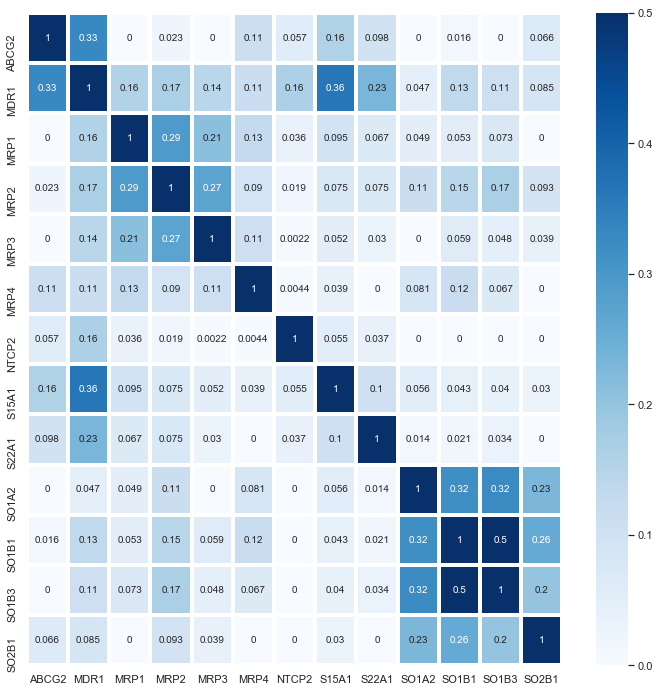

In [9]:
correlation_matrix.to_csv("correlation.csv") # OK, it is the TableS2, u got it!

plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix,linewidths=3, annot=True, vmax=0.5,  cmap="Blues")
#plt.yticks(rotation=30)
#plt.xticks(rotation=30)
plt.savefig("cram_v.tiff", dpi=300)